In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import scipy as sp

We will be plotting heatmaps of all arrays in the 'example arrays' folder, so first we will get the file names of the listed arrays

In [3]:
names = glob.glob('../data/example_arrays/*')

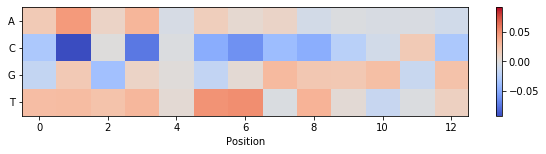

In [16]:

for n in names:
    tempdf = pd.io.parsers.read_csv(n,delim_whitespace=True)
    #convert the dataframe storage format into a numpy array (of shape 4xL) that can be more easily
    #plotted
    temparr = np.array(tempdf[['val_A','val_C','val_G','val_T']])
    
    #we want to make sure the color bar is symmetric around zero, so we need to find the maximum value,
    #in the energy matrix, so we can set the upper and lower extent of the color bar
    maximum = np.max(np.abs(temparr))
    
    #now plot using matplotlib
    fig,ax = plt.subplots(figsize=((10,2)))
    plt.imshow(temparr.T,aspect='auto',interpolation='nearest',cmap='coolwarm',vmin=-maximum,vmax=maximum)
    plt.colorbar()
    plt.xlabel('Position')
    #ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels(['','A','C','G','T'])
    #save the output image in the same file location as the input array.
    plt.savefig(n+'_array',format='eps')